### TASK 1 - PREDICTION USING SUPERVISED ML
* Task - Predict the percentage of an student based on the no. of study hours.

#### BY AAKRITI NAG

In [1]:
# importing libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv("student_scores - student_scores.csv")

In [3]:
# display data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# check for any null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# describe values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plot the data accordingly

<Figure size 720x720 with 0 Axes>

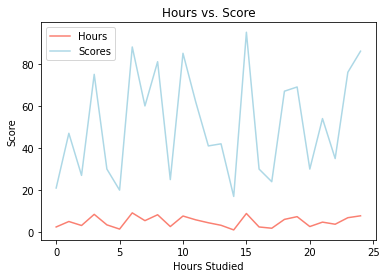

In [7]:
plt.figure(figsize=(10,10))

data.plot(color=["salmon", "lightblue"])
plt.title("Hours vs. Score")
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.xticks(rotation=0);

### Split the data into train and test data

In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [9]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model and fit the data

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.score(X_test, y_test)

0.9678055545167994

#### Predict using model

In [12]:
y_preds=model.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual Data': y_test, 'Predicted Values': y_preds})  
df 

,Actual Data,Predicted Values
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


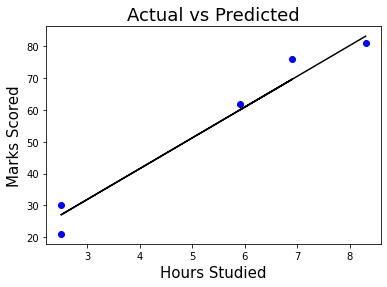

In [17]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_preds, color='Black')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks Scored', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### Evaluating the model

In [15]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,y_preds))

Mean absolute error:  3.9207511902099244


#### Predicting score when studied for 9.25 hours

In [16]:
hours = [9.25]
answer = model.predict([hours])
print("Predicted Score = {}".format(round(answer[0],3)))

Predicted Score = 92.386


#### Hence, if the student studies for 9.25 hours, that person will score 92.386 according to the regression model.